In [2]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text  # Importa la libreria per evitare sovrapposizioni

In [3]:
# Abilita la cache
ff1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


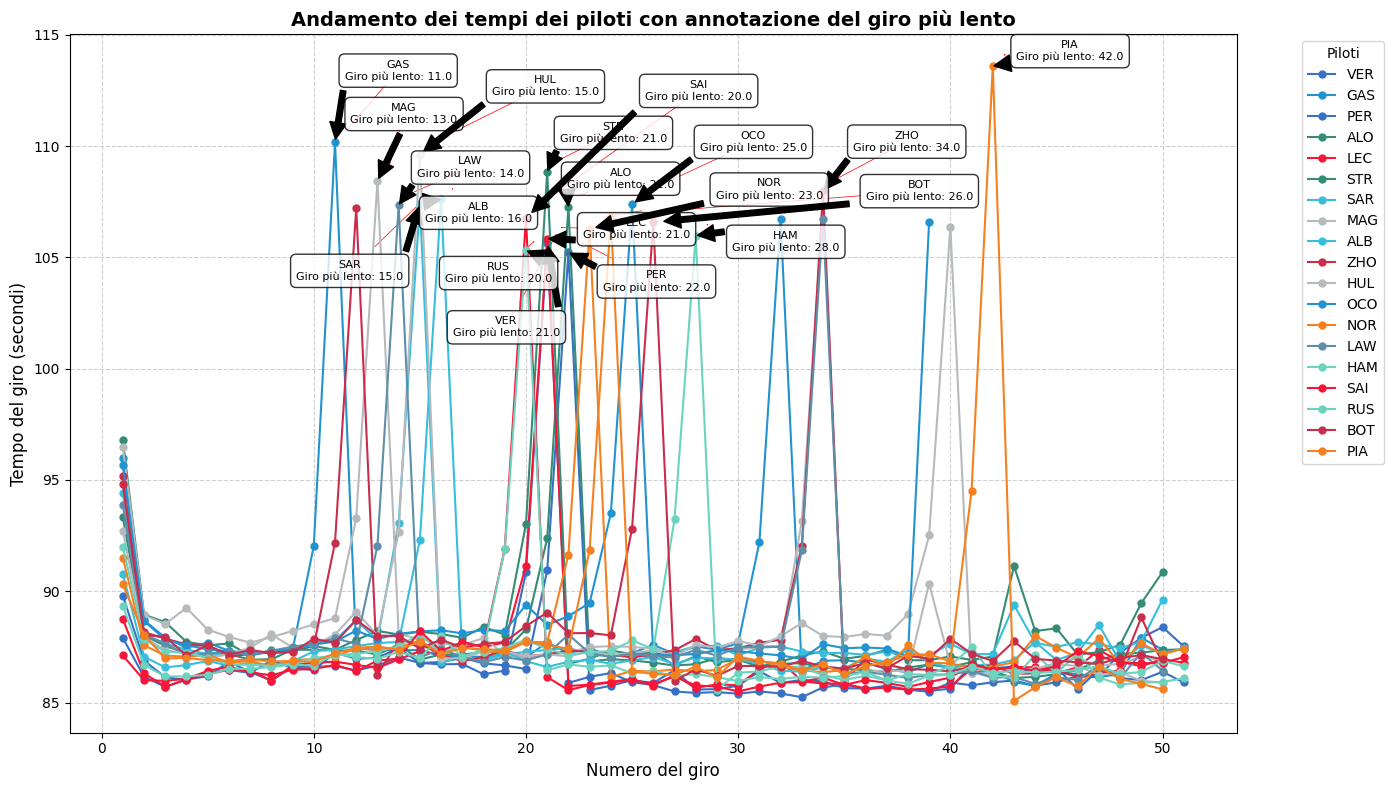

In [4]:
# Carica la sessione desiderata
session = ff1.get_session(2023, 'Monza', 'R')  # Sostituisci con l'anno, il circuito e la sessione desiderati
session.load()

# Ottieni i dati dei giri
laps = session.laps

# Crea un dizionario per mappare i piloti ai colori delle scuderie
team_colors = {}
driver_abbreviations = {}  # Dizionario per i nomi abbreviati dei piloti
for driver in laps['Driver'].unique():
    driver_info = session.get_driver(driver)
    color = driver_info.TeamColor
    # Aggiungi il prefisso '#' se non è già presente
    if not color.startswith('#'):
        color = '#' + color
    team_colors[driver] = color
    driver_abbreviations[driver] = driver_info.Abbreviation  # Salva l'abbreviazione del pilota

# Crea una figura e un asse per il grafico
fig, ax = plt.subplots(figsize=(14, 8))

# Lista per memorizzare le annotazioni
annotations = []

# Itera attraverso ogni pilota e traccia i suoi tempi sui giri
for driver in laps['Driver'].unique():
    driver_laps = laps[laps['Driver'] == driver]
    
    # Verifica se ci sono dati validi per il pilota
    if not driver_laps.empty and not driver_laps['LapTime'].isnull().all():
        # Filtra i giri con tempi validi
        valid_laps = driver_laps.dropna(subset=['LapTime'])
        
        # Traccia i tempi validi
        ax.plot(valid_laps['LapNumber'], valid_laps['LapTime'].dt.total_seconds(), 
                color=team_colors[driver], label=driver, marker='o', markersize=5, linestyle='-')

        # Trova il giro più lento per il pilota corrente
        if not valid_laps.empty:  # Verifica se ci sono tempi validi
            slowest_lap = valid_laps.loc[valid_laps['LapTime'].idxmax()]
            slowest_lap_time = slowest_lap['LapTime'].total_seconds()  # Tempo in secondi
            slowest_lap_number = slowest_lap['LapNumber']  # Numero del giro

            # Ottieni l'abbreviazione del pilota
            driver_abbr = driver_abbreviations[driver]

            # Aggiungi un'annotazione alla lista
            annotations.append(ax.annotate(f'{driver_abbr}\nGiro più lento: {slowest_lap_number}', 
                                          xy=(slowest_lap_number, slowest_lap_time), 
                                          xytext=(slowest_lap_number + 0.5, slowest_lap_time + 0.5),  # Posizione del testo
                                          arrowprops=dict(facecolor='black', shrink=0.05),  # Freccia
                                          bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),  # Riquadro
                                          fontsize=8, color='black'))

# Usa adjust_text per evitare sovrapposizioni delle annotazioni
adjust_text(annotations, ax=ax, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

# Imposta le etichette degli assi e il titolo del grafico
ax.set_xlabel('Numero del giro', fontsize=12)
ax.set_ylabel('Tempo del giro (secondi)', fontsize=12)
ax.set_title('Andamento dei tempi dei piloti con annotazione del giro più lento', fontsize=14, fontweight='bold')

# Aggiungi una griglia per migliorare la leggibilità
ax.grid(True, linestyle='--', alpha=0.6)

# Aggiungi una legenda
ax.legend(title="Piloti", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mostra il grafico
plt.tight_layout()
plt.show()